In [1]:
# to read csv files
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# we read our csv file
data = pd.read_csv('wdbc_target_value=1.csv')

In [3]:
# We assign dependent variable to (label) a variable. You should know where is your dependent data and you should exactly choose that with slicing syntax.
label = data.iloc[:,1:2].values

# We are dividing our data to test and train.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,2:],label,test_size=0.33,random_state=0)

# We import SVC class ( Support Vector Classifier )
from sklearn.svm import SVC

In [11]:
# We created a object from SVC class
# Different kernel trick types can be given as parameters.
# It will be observed that the success rate has changed. ( ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ )
# default value for kernel is rbf
svc = SVC(kernel = 'linear')


# Training the machine
svc.fit(x_train,np.ravel(y_train))

# We gave the test data set and to provide diagnosis prediction
result = svc.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix
# We enter the data we will compare as parameters.
# y_test : We enter the true Diagnosis test data
# result : Diagnosis data that we estimate from x_test data
# Confusion Matrix Result :
# [[74 47]
#  [56 11]]
cm = confusion_matrix(y_test,result)
print(cm)

from sklearn import svm

[[ 65   2]
 [  6 115]]


In [13]:
from sklearn import metrics

#You can easily use this library to see Precision,Recall,f1-score,accury.
print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        67
           1       0.98      0.95      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188



In [14]:
from sklearn.metrics import log_loss

#You need to have numerical target attribute to use log loss.
print("\n\n log los:",log_loss(y_test, result))




 log los: 1.4697436720965211


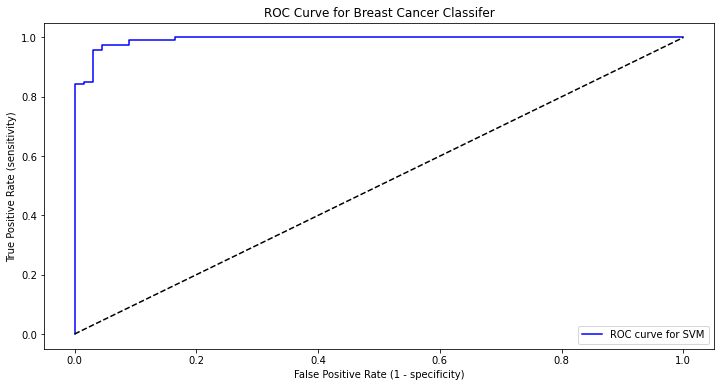

In [15]:
from sklearn.metrics import roc_curve

#If you change the key word you can see the roc curve changes in plot. SVC(kernel = 'the key word')

y_score = svc.fit(x_train,np.ravel(y_train)).decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, np.ravel(y_score))

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve for SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curve for Breast Cancer Classifer')
plt.legend(loc="lower right")

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# You can change the kernel key. Then the value will change.

clf = KNeighborsClassifier(n_neighbors=5,metric='minkowski')

scores = cross_val_score(clf, data.iloc[:,2:], np.ravel(data.iloc[:,1:2].values), cv=5)

print(scores)

[0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]


In [26]:
# Success Rate
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, result)
# Result : 0.4521276595744681
print(accuracy)



0.9574468085106383


In [41]:
sum(scores)/len(scores)

0.9279459711224964